# 분류
# k-nn을 이용한 클래스 분류

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:

fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 훈련 - 테스트 셋 나누기

train_input, test_input, train_target, test_target = train_test_split(fish_input,
                                                                     fish_target,
                                                                     random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# 특성 정규화

ss= StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# k-nn으로 분류기의 확률 예측하기

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kn = KNeighborsClassifier(n_neighbors = 3)

kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [12]:
# 저장된 타겟값의 순서

kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [13]:
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals =4)) # 소수점 네번째자리까지 표기

# test_caled의 데이터가 어떤 클래스에 속할지에 대한 확률값 반환

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


# 로지스틱 회귀분석

* 피쳐 정규화 필요
* 피쳐 = 배열의 형태/ 타겟 = 이진분류형식. 꼭 0과 1이 아니어도 괜찮음. 

`시그모이드 함수`를 사용하여 예측값이 음수이면 0을 아주 큰 양수일때 1이되록 하는 모델

시그모이드 함수는 출력이 0.5보다 작으면 음성 클래스로 크면 양성 클래스로 판단한다.

x축 = 0일때 y축 0.5임 이를 기준으로 음성 클래스, 양성클래스를 판단한다.

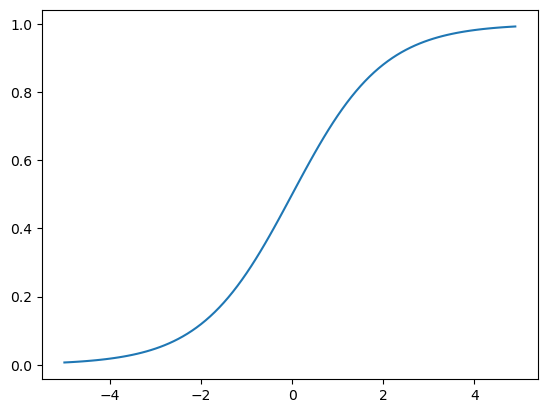

In [14]:
z = np.arange(-5,5,0.1)
phi = 1/(1 + np.exp(-z))
plt.plot(z,phi)

In [ ]:
# 이진분류 수행하기

In [15]:
char_arr = np.array(['a','b','c','d','e'])
print(char_arr[[True,False,True,False,False]])

['a' 'c']


In [33]:
# 도미이거나 빙어인 행만 추출

bs_index = (train_target== 'Bream') | (train_target == 'Smelt') # boolean 형식으로 변수에 할당
train_bs = train_scaled[bs_index]
target_bs = train_target[bs_index]

In [34]:
train_bs

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [41]:
target_bs

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

### 사이킷런 LogisticREgression

solver 옵션을 통해 최적화 방법 설정 가능

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr.fit(train_bs, target_bs)

LogisticRegression()

In [37]:
print(lr.classes_)
print(lr.predict_proba(train_bs[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [38]:
print(lr.coef_) # 각 특성의 계수
print(lr.intercept_) 

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]]
[-2.16155132]


In [39]:
# 다음의 파라미터를 바탕으로 모델이 계산한 예측값(decision)

decision = lr.decision_function(train_bs[:5])
print(decision)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [40]:
# 다음의 값을 시그모이드 함수에 통과시키면 확률값을 얻을 수 있음

from scipy.special import expit 

# expit 시그모이드 함수로 계산해줌
print(expit(decision))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 다중 분류 수행하기


세 개 이상의 선택지 중 하나를 고르는 문제를 다중 클래스 분류라고 함. 

* LogisticRegression은 반복알고리즘임. 충분히 훈련하기 위해 반복 횟수 `max_iter` 를 1000으로 지정
* 로지스틱은 릿지의 규제와 같이 계수의 제곱을 규제함(L2규제) `C =20`으로 지정하여 작을수록 규제 커짐 기본 1임
* 다중분류는 `소프트맥스 함수`를 이용하여 확률을 계산(정규화된 지수함수에 해당한다)  https://wikidocs.net/35476

특정 피쳐에 대해 꽃의 종류가 setosa인지, versicolor가인지, virginica 분류하기 위해 각 정답지에 대해서 시그모이드 함수를 적용할 수 있습니다. 만약 그렇게 한다면, setosa가 정답일 확률은 0.8, versicolor가 정답일 확률은 0.2, virginica가 정답일 확률은 0.4 등과 같은 출력을 얻게됩니다. 그런데 이 전체 확률의 합계가 1이 되도록 하여 전체 선택지에 걸친 확률로 바꿀 순 없을까요? 예를 들어 샘플 데이터가 입력으로 들어오면 모델이 setosa일 확률이 0.7, versicolor일 확률 0.05, virginica일 확률이 0.25과 같이 세 개의 확률의 총 합이 1인 예측값을 얻도록 하자는 것입니다. 그리고 이 경우 확률값이 가장 높은 setosa로 예측한 것으로 간주하고자 합니다. 이럴 때 사용할 수 있는 것이 소프트맥스 함수입니다.

* 세 개 이상으로 분류하는 다중 클래스 분류에서 사용하는 활성화 함수다.
* 소프트맥스 함수는 분류될 클래스가 n개라 할 때, n차원의 벡터를 입력받아서 각 클래스에 속할 확률을 추정한다.
* 출력의 합은 1이 된다. 죽, 예측하고자하는 분류 종류에 대해 각각 확률을 계산한다. 

In [48]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))

0.9327731092436975


In [49]:
from scipy.special import softmax

In [51]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals =2))

print()


# 5개 샘플에 대한 예측이라서 5개 행 출력됨
# 생선 종류가 7개니까 7개의 열
# 7개의 중 가장 높은 proba값을 출력하는 클래스가 예측 클래스가 되며 이 proba값은 소프트맥스 함수를 통해 확률로 계산된다.

proba = softmax(decision, axis =1)
print(np.round(proba, decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 경사 하강법

* `확률적 경사하강법`: 훈련세트에서 샘플 하나씩을 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
* `미니배치 경사하강법`: 샘프을 하나씩 사용하지 않고 여러개를 사용
* `배치 경사 하강법`: 한번에 전체 샘프을 사용

# 로지스틱 손실함수

https://ukb1og.tistory.com/22

https://wikidocs.net/22881


# SGDClassifier

* 확률적 경사하강법을 사용한 분류 알고리즘
* 확률적 경사하강법을 사용한 회귀 알고리즘으로는 SGDRegressor가 있다


*`SGDClassifier()`에서 `loss`는 손실함수 종류를 지정한다. '

`log'`로 로지스틱 손실함수로 지정
max_iter는 `epochs`를 지정, 전체 훈련세트에 대해 10회 반복 지정


In [52]:
from sklearn.linear_model import SGDClassifier

In [56]:
sc = SGDClassifier(loss='log', max_iter = 10, random_state=42)

sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


# convergence warning 이유: 충분한 반복을 하지 않았기 때문임. max_iter값을 늘려주면 해결

0.773109243697479
0.775


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [57]:
# 에포크를 수동으로 실행하기

sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85
